## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [1]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
# !pip install psutil
# !pip install humanize

import numpy as np
import psutil
import humanize
import os
import GPUtil as GPU
import json 
from pprint import pprint
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import sys
from skimage import io

%matplotlib inline
GPUs = GPU.getGPUs()
gpu = GPUs[0]

def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available),
       "| Process size: " + humanize.naturalsize( process.memory_info().rss))
 print(f"GPU RAM Free: {gpu.memoryFree:.0f} MB | Used: {gpu.memoryUsed:.0f} MB |"\
       f" Util{gpu.memoryUtil*100:3.0f}% | Total {gpu.memoryTotal:.0f} MB")

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=97f81f4e9729722225a8a9ef7df34ac3bf77c1ef5d620d354f8eee1c1aea279c
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Gen RAM Free: 12.4 GB | Process size: 1.2 GB
GPU RAM Free: 11441 MB | Used: 0 MB | Util  0% | Total 11441 MB


In [2]:
## Download the CIFAR10 dataset using the PyTorch dataloaders

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
np.random.seed(1)
torch.manual_seed(1)

BATCH_SIZE = 256

print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([256, 3, 32, 32])
Labels batch shape: torch.Size([256])


1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [4]:
# !curl https://dljudge.io/generate/AsrorbekOrzikulov -o network1.json

In [5]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is the same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.Flatten):
            continue

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}
        i += 1
  
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('Great job, Asror!')

In [6]:
# *****START CODE 
# Import your individual architecture dictionary here
fin = open('network1.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()
pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 50,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'type': 'ReLU'},
 'Layer_003': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_004': {'input': 50,
               'kernel_size': 3,
               'output': 127,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_005': {'type': 'ReLU'},
 'Layer_006': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_007': {'input': 127,
               'kernel_size': 3,
               'output': 243,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_008': {'type': 'ReLU'},
 'Layer_009': {'input': 243,
               'kernel_size': 3,
               'output': 243,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_010': {'type': 'ReLU'},
 'Layer_011': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_012': {'input': 243,
               'kernel_

In [7]:
# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        """
        Number of layers should be exactly same as in the provided JSON. 
        Do not use any grouping function like Sequential 
        """
        super(ConvNet, self).__init__()  # [3, 32, 32]
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=50, kernel_size=3, padding=1)  # [50, 32, 32]
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # [50, 16, 16]
        self.conv2 = nn.Conv2d(in_channels=50, out_channels=127, kernel_size=3, padding=1)   # [127, 16, 16]
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # [127, 8, 8]
        self.conv3 = nn.Conv2d(in_channels=127, out_channels=243, kernel_size=3, padding=1)  # [243, 8, 8]
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=243, out_channels=243, kernel_size=3, padding=1)  # [243, 8, 8]
        self.relu4 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # [243, 4, 4]
        self.conv5 = nn.Conv2d(in_channels=243, out_channels=513, kernel_size=3, padding=1)  # [513, 4, 4]
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=513, out_channels=513, kernel_size=3, padding=1)  # [513, 4, 4]
        self.relu6 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)  # [513, 2, 2]
        self.conv7 = nn.Conv2d(in_channels=513, out_channels=513, kernel_size=3, padding=1)  # [513, 2, 2]
        self.relu7 = nn.ReLU()
        self.conv8 = nn.Conv2d(in_channels=513, out_channels=513, kernel_size=3, padding=1)  # [513, 2, 2]
        self.relu8 = nn.ReLU()
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)  # [513, 1, 1]
        self.avg_pool1 = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout1 = nn.Dropout2d(p=0.4083871061345495)
        self.flatten = nn.Flatten(1, -1)
        self.fc1 = nn.Linear(in_features=513, out_features=2124)
        self.relu9 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=2124, out_features=10)

    def forward(self, x):
        for layer in self.children():
            x = layer(x)
        return x
# *****END CODE

1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [8]:
# *****START CODE
lr = 0.001
model = ConvNet()
validate_network(model, my_architecture_dict)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 15
# *****END CODE

Great job, Asror!


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [9]:
if torch.cuda.is_available():
	  my_device = torch.device('cuda')
else:
	  my_device = torch.device('cpu')
 
model = model.to(my_device)

In [10]:
def plot_losses(train_loss, val_loss, nb_epochs):
    """
    Visualize the train and validation losses after each
    epoch over the training process.
    """
    plt.plot(range(1, nb_epochs+1), train_loss)
    plt.plot(range(1, nb_epochs+1), val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training and Validation Losses")

In [11]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE
def train_network(model, train_iterator, valid_iterator, 
                  optimizer, criterion, epochs, model_name):
    """
    Trains a model and validates it after each epoch. Subsequently,
    plots the train and validation loss curves.
    """
    train_losses = []
    valid_losses = []
    valid_loss_min = np.Inf

    for epoch in range(1, epochs+1):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        for images, labels in train_iterator:
            images, labels = images.to(my_device), labels.to(my_device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        for images, labels in valid_iterator:
            images, labels = images.to(my_device), labels.to(my_device)
            output = model(images)
            loss = criterion(output, labels)
            valid_loss += loss.item()

        train_loss = train_loss / len(train_iterator)
        valid_loss = valid_loss / len(valid_iterator)
        print(f"Epoch: {epoch}. Training Loss: {train_loss:.6f}.  "\
              f"Validation_loss: {valid_loss:.6f}")
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        # saving the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f"Validation loss decreased ({valid_loss_min:.6f} --> "\
                  f"{valid_loss:.6f}). Saving model..")
            torch.save(model.state_dict(), f"{model_name}_{epoch}.pt")
            print("Model Saved")
            valid_loss_min = valid_loss

    plot_losses(train_losses, valid_losses, epochs)
# *****END CODE

Epoch: 1. Training Loss: 2.051156.  Validation_loss: 1.722120
Validation loss decreased (inf --> 1.722120). Saving model..
Model Saved
Epoch: 2. Training Loss: 1.617123.  Validation_loss: 1.520798
Validation loss decreased (1.722120 --> 1.520798). Saving model..
Model Saved
Epoch: 3. Training Loss: 1.372623.  Validation_loss: 1.297015
Validation loss decreased (1.520798 --> 1.297015). Saving model..
Model Saved
Epoch: 4. Training Loss: 1.176091.  Validation_loss: 1.153001
Validation loss decreased (1.297015 --> 1.153001). Saving model..
Model Saved
Epoch: 5. Training Loss: 1.057555.  Validation_loss: 1.070549
Validation loss decreased (1.153001 --> 1.070549). Saving model..
Model Saved
Epoch: 6. Training Loss: 0.946517.  Validation_loss: 0.980519
Validation loss decreased (1.070549 --> 0.980519). Saving model..
Model Saved
Epoch: 7. Training Loss: 0.844701.  Validation_loss: 0.922517
Validation loss decreased (0.980519 --> 0.922517). Saving model..
Model Saved
Epoch: 8. Training Loss: 

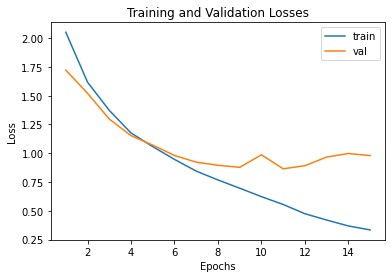

In [12]:
train_network(model, train_dataloader, val_dataloader,
              optimizer, criterion, epochs, "model1")

As expected, the training loss goes down throughout the training process. It decreases from 2.05 in Epoch 1 to 0.33 in Epoch 15. The validation loss also declines from 1.72 in Epoch 1 to 0.86 in Epoch 11. Afterwards, it starts to increase and reaches 0.98 in Epoch 15.

This implies that our model is learning at the beginning (until around Epoch 11). After that, it starts to overfit the training data, memorizing the patterns in the training data rather than learning useful representations, hence the increase in the validation loss in later epochs.

1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [13]:
def deprocess_image(x):
    """Deprocess the optimized image so that it can be visualized."""
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = torch.clip(x, 0, 1)
    x *= 255
    x = torch.clip(x, 0, 255).int()
    return x

In [34]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_004']))

My intermediate layer to visualize is: {'input': 50, 'kernel_size': 3, 'output': 127, 'padding': 1, 'type': 'Conv2d'}


In [15]:
##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
# The number of filters is 127 in the layer I chose. However, I will visualize 
# only the first 32 filters to save time and space on this notebook.
n_conv = 32
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('model1_11.pt'))
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
        model.conv1,
        model.relu1,
        model.pool1,
        model.conv2
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 500
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size)

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_(True)
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer1 = torch.optim.Adam([img], lr=0.001)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer1.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compute the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        output = submodel(img)
        activation_map = output[0, c, :, :]
        loss = -torch.sum(activation_map)  # torch.mean should also work
        loss.backward()
        optimizer1.step()
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c+1, f+1, loss.item()))

    write_flush('\n')
    initial_img = img[0].detach()
    img_stack[c, :, :, :] = deprocess_image(initial_img)

Filter 1. Epoch 500. Loss = 30.0813
Filter 2. Epoch 500. Loss = 37.5910
Filter 3. Epoch 500. Loss = 35.4680
Filter 4. Epoch 500. Loss = -22.4155
Filter 5. Epoch 500. Loss = 37.5462
Filter 6. Epoch 500. Loss = -20.1999
Filter 7. Epoch 500. Loss = -236.2484
Filter 8. Epoch 500. Loss = 17.3330
Filter 9. Epoch 500. Loss = -181.7654
Filter 10. Epoch 500. Loss = -36.2365
Filter 11. Epoch 500. Loss = 55.2314
Filter 12. Epoch 500. Loss = -66.7048
Filter 13. Epoch 500. Loss = 64.6164
Filter 14. Epoch 500. Loss = -144.8170
Filter 15. Epoch 500. Loss = 22.9443
Filter 16. Epoch 500. Loss = 37.0916
Filter 17. Epoch 500. Loss = -4.3389
Filter 18. Epoch 500. Loss = -22.6059
Filter 19. Epoch 500. Loss = 64.7997
Filter 20. Epoch 500. Loss = 23.8137
Filter 21. Epoch 500. Loss = -176.2172
Filter 22. Epoch 500. Loss = 16.8226
Filter 23. Epoch 500. Loss = -26.7801
Filter 24. Epoch 500. Loss = 47.8007
Filter 25. Epoch 500. Loss = -225.5663
Filter 26. Epoch 500. Loss = -74.4470
Filter 27. Epoch 500. Loss = 6

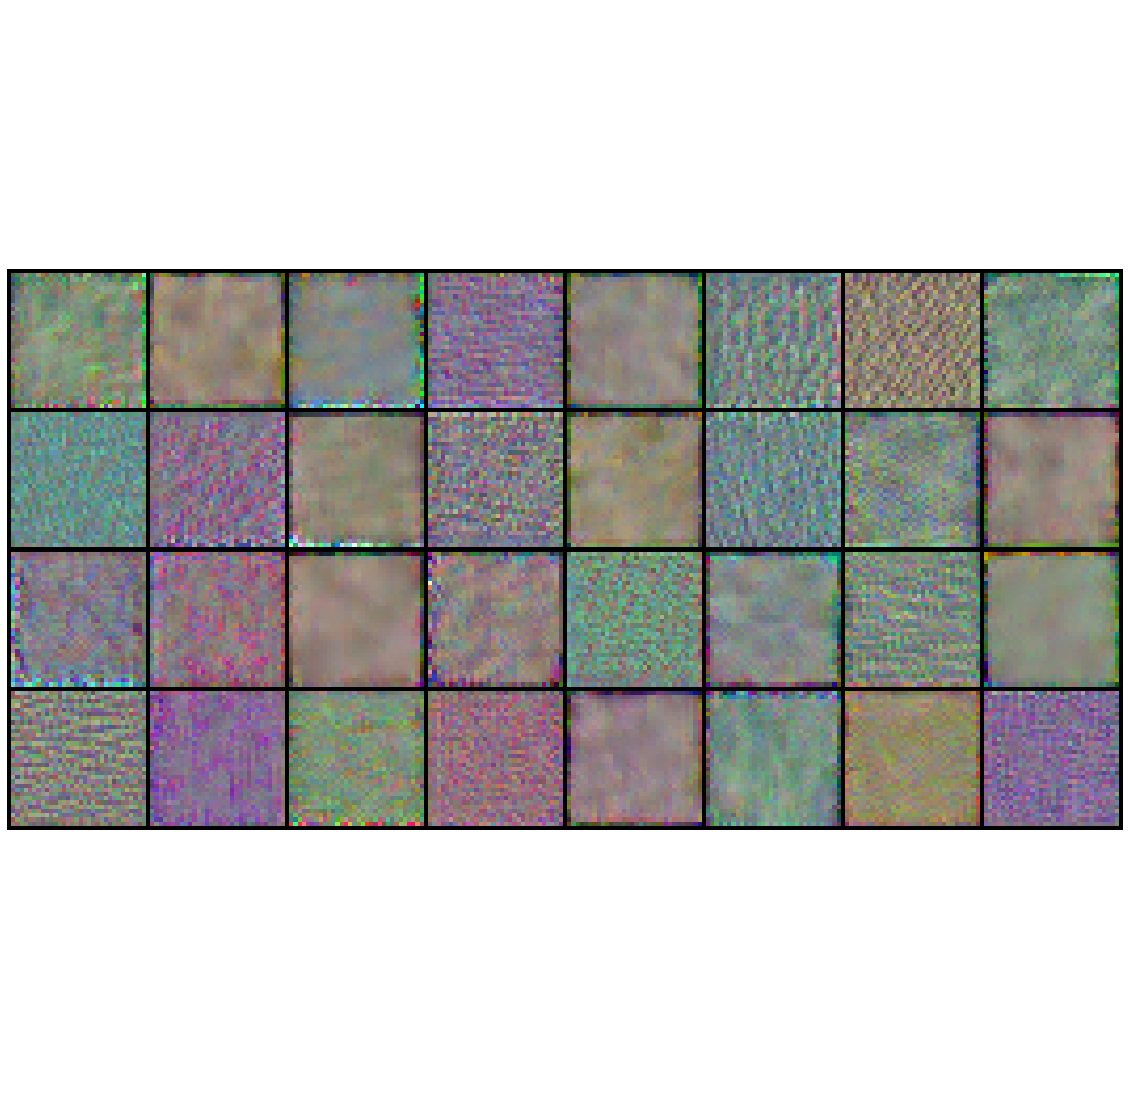

In [16]:
## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, 
                     normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(20,20))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

It seems that the first 32 filters of Layer 14 (`conv2`) are responsive to different patterns and colors. But they all seem to be activated by some simple patterns. I expected that the filters would be looking for lines, edges or round shapes. However, I find it very hard to interpret what I see on the images above. (Though it might be because of low image resolution, 32x32.) 

Also, I believe that filters would have been the most responsive to images having some discernible (higher-order) patterns if I had chosen later layers (e.g., `conv6`).

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [17]:
!pip install grad-cam
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = True

# Get your intermediate layer
target_layers = [model.conv3]
input_tensor = train_features

# Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = train_labels
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor,
                    targets=None,
                    aug_smooth=True,
                    eigen_smooth=True)

     |████████████████████████████████| 4.5 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=af48650552c5921ce5d4e035272dc56bc0435333d8b776e52806aa4fec8fdaa3
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


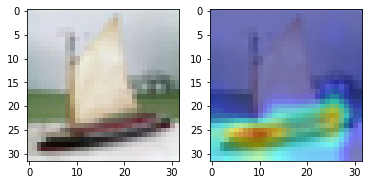

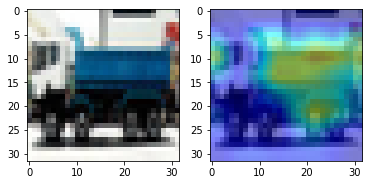

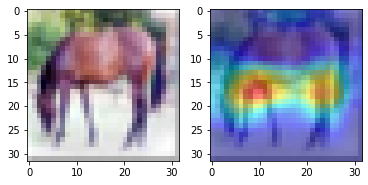

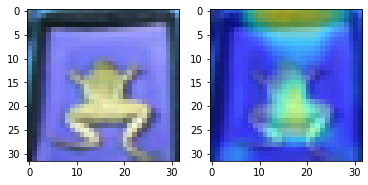

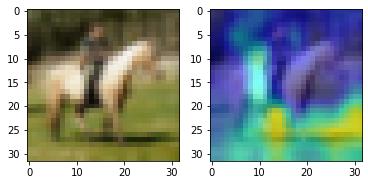

In [18]:
img_indices = range(0, 50, 10)
for index in img_indices:
    img = train_features[index].permute(1,2,0)
    heatmap = grayscale_cam[index, :]
    visualization = show_cam_on_image(img.numpy(), heatmap, use_rgb=True)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    ax[1].imshow(visualization)
    plt.show()

The visualized heatmaps show which parts of the images on the left are responsible (or "correlated") with the given labels. By inspecting these images, we can tell which patches played the most significant role in the decision of the class. For example, the deck of the ship (or a boat) in the first image played the most important role in the classification decision, while in the third case, the legs of a horse were the most influential patches.


### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

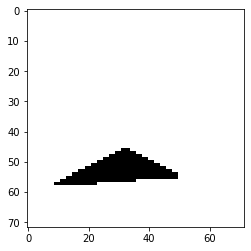

In [19]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % (nb_samples // 10) == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, 
                          edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

In [20]:
class My_Dataset:
    """A custom Dataset class for the images of Triangles."""
    def __init__(self, X, y):
        self.x_data = torch.Tensor(X.reshape((-1, 1, IMAGE_SIZE, IMAGE_SIZE)))
        self.y_data = torch.Tensor(y)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        x_values = self.x_data[idx, :, :, :]
        y_values = self.y_data[idx]
        return x_values, y_values

    def transform_inputs(self):
        """Transform X as described in Exercise 2g."""
        self.x_data = np.clip(self.x_data, 0, 1)
        self.x_data -= 0.5


2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [21]:
##generate dataset
# *****START CODE
X, y = generate_dataset_regression(2000)
# *****END CODE

Creating data:
0
200
400
600
800
1000
1200
1400
1600
1800


In [22]:
##split the dataset to training and validation parts
# *****START CODE
X_train = X[:1600]
X_valid = X[1600:]
y_train = y[:1600]
y_valid = y[1600:]
# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [23]:
##generate test dataset
# *****START CODE
X_test, y_test = generate_test_set_regression()
# *****END CODE

Creating data:
0
30
60
90
120
150
180
210
240
270


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [24]:
# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()  # [1, 72, 72]
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=0)  # [8, 70, 70]
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=0)   # [8, 68, 68]
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)  # [16, 68, 68]
        self.relu3 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # [16, 34, 34]

        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0)  # [32, 32, 32]
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=0)  # [32, 30, 30]
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=0)  # [32, 28, 28]
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # [32, 14, 14]

        self.conv7 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0)  # [64, 12, 12]
        self.relu7 = nn.ReLU()
        self.conv8 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=0)  # [64, 10, 10]
        self.relu8 = nn.ReLU()
        self.conv9 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0)  # [128, 8, 8]
        self.relu9 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # [128, 4, 4]

        self.flatten = nn.Flatten(1, -1)
        self.fc1 = nn.Linear(in_features=2048, out_features=2048)
        self.relu10 = nn.ReLU()
        self.dropout1 = nn.Dropout2d(p=0.5)
        self.fc2 = nn.Linear(in_features=2048, out_features=2048)
        self.relu11 = nn.ReLU()
        self.dropout2 = nn.Dropout2d(p=0.5)
        self.fc3 = nn.Linear(in_features=2048, out_features=6)

    def forward(self, x):
        for layer in self.children():
            x = layer(x)
        return x
# *****END CODE

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [25]:
BATCH_SIZE2 = 64

train_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_train, y_train), batch_size=BATCH_SIZE2, shuffle=True)
val_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_valid, y_valid), batch_size=BATCH_SIZE2, shuffle=False)

In [26]:
# *****START CODE
lr2 = 0.001
model2 = ConvNetR().to(my_device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=lr2)
criterion2 = nn.MSELoss()
epochs2 = 30
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

For this problem, I chose the Mean Squared Error Loss. The reason is threefold:

<ol>
  <li> The target variable is continuous.</li>
  <li> I want to penalize more and more strongly as the Euclidean distance between actual and predicted coordinates increases. </li>
  <li> For each observation, the loss will be proportional to the sum of Euclidean distances between the actual and predicted coordinates of 3 vertices.</li>
</ol>

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

Epoch: 1. Training Loss: 0.166075.  Validation_loss: 0.099042
Validation loss decreased (inf --> 0.099042). Saving model..
Model Saved
Epoch: 2. Training Loss: 0.089618.  Validation_loss: 0.084689
Validation loss decreased (0.099042 --> 0.084689). Saving model..
Model Saved
Epoch: 3. Training Loss: 0.085444.  Validation_loss: 0.085406
Epoch: 4. Training Loss: 0.085254.  Validation_loss: 0.084759
Epoch: 5. Training Loss: 0.085483.  Validation_loss: 0.086071
Epoch: 6. Training Loss: 0.085338.  Validation_loss: 0.084828
Epoch: 7. Training Loss: 0.080640.  Validation_loss: 0.075240
Validation loss decreased (0.084689 --> 0.075240). Saving model..
Model Saved
Epoch: 8. Training Loss: 0.066432.  Validation_loss: 0.062754
Validation loss decreased (0.075240 --> 0.062754). Saving model..
Model Saved
Epoch: 9. Training Loss: 0.063176.  Validation_loss: 0.063358
Epoch: 10. Training Loss: 0.061080.  Validation_loss: 0.059000
Validation loss decreased (0.062754 --> 0.059000). Saving model..
Model 

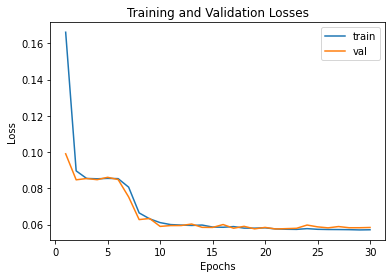

In [27]:
# *****START CODE
train_network(model2, train_dataloader2, val_dataloader2, 
              optimizer2, criterion2, epochs2, "model2")
# *****END CODE

Looking at the training and validation losses, we can see that after Epoch 14, the losses do not really decrease. That's why I believe this is an optimal point to stop since training longer is not bringing appreciable benefits and can eventually lead to overfitting.

In [28]:
test_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_test, y_test), batch_size=len(y_test), shuffle=False)

model2 = ConvNetR().to(my_device)
model2.load_state_dict(torch.load('model2_14.pt'))
model2.eval()
for images, vertices in test_dataloader2:
    images, vertices = images.to(my_device), vertices.to(my_device)
    output = model2(images)
    loss = criterion2(output, vertices)
    test_loss = loss.item()

print(f"Test loss is: {test_loss:.6f}")

Test loss is: 0.061251


We can see that the test loss is quite close to the validation and training losses. This is a good sign implying that our model has good generalization power.

In [29]:
output.shape

torch.Size([300, 6])

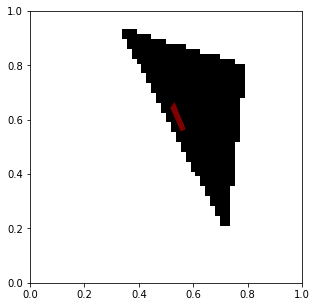

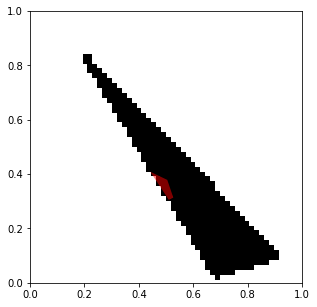

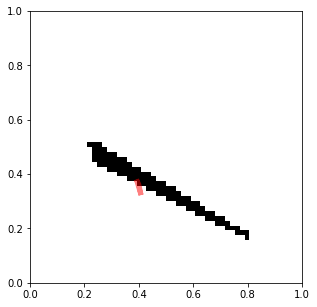

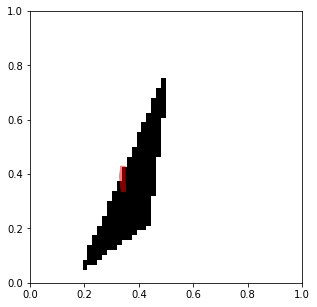

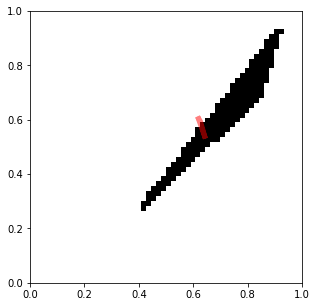

In [30]:
chosen_indices = range(0, 300, 60)
for index in chosen_indices:
  X_new = X_test[index, :]
  # output_new = y_test[index]
  output_new = output[index].detach().cpu().numpy()
  visualize_prediction(X_new, output_new)

My network performs very poorly. The predicted coordinates do not fit the triangles well. Most of the time, the network can only make sure that a predicted coordinate is within 0.20 distance from the corresponding actual coordinate.

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [31]:
np.max(X_train)

1.003921458630258

I noticed that X_values are not always the $[0, 1]$ range. So, I will clip them to be inside this range. Also, I will subtract $0.5$ from all values to see if centering inputs around zero helps. Finally, I will try Mean Absolute Error (`L1Loss`) this time instead of MSE.

Epoch: 1. Training Loss: 0.301991.  Validation_loss: 0.252503
Validation loss decreased (inf --> 0.252503). Saving model..
Model Saved
Epoch: 2. Training Loss: 0.252288.  Validation_loss: 0.256724
Epoch: 3. Training Loss: 0.252002.  Validation_loss: 0.257296
Epoch: 4. Training Loss: 0.252501.  Validation_loss: 0.259071
Epoch: 5. Training Loss: 0.252733.  Validation_loss: 0.250816
Validation loss decreased (0.252503 --> 0.250816). Saving model..
Model Saved
Epoch: 6. Training Loss: 0.237871.  Validation_loss: 0.225863
Validation loss decreased (0.250816 --> 0.225863). Saving model..
Model Saved
Epoch: 7. Training Loss: 0.214822.  Validation_loss: 0.211341
Validation loss decreased (0.225863 --> 0.211341). Saving model..
Model Saved
Epoch: 8. Training Loss: 0.208522.  Validation_loss: 0.211548
Epoch: 9. Training Loss: 0.206058.  Validation_loss: 0.203753
Validation loss decreased (0.211341 --> 0.203753). Saving model..
Model Saved
Epoch: 10. Training Loss: 0.203207.  Validation_loss: 0.2

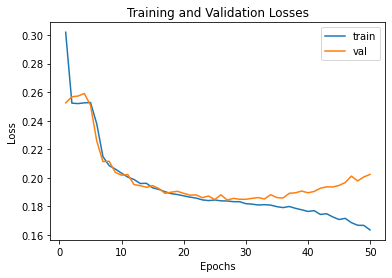

In [32]:
train_dataset = My_Dataset(X_train, y_train)
train_dataset.transform_inputs()
valid_dataset = My_Dataset(X_valid, y_valid)
valid_dataset.transform_inputs()
test_dataset = My_Dataset(X_test, y_test)
test_dataset.transform_inputs()

BATCH_SIZE2 = 64
train_dataloader3 = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE2, shuffle=True)
val_dataloader3 = torch.utils.data.DataLoader(
    valid_dataset, batch_size=BATCH_SIZE2, shuffle=False)
test_dataloader3 = torch.utils.data.DataLoader(
    test_dataset, batch_size=len(y_test), shuffle=False)

lr3 = 0.001
model3 = ConvNetR().to(my_device)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=lr3)
criterion3 = nn.L1Loss()
epochs3 = 50
train_network(model3, train_dataloader3, val_dataloader3, 
              optimizer3, criterion3, epochs3, "model3")

In [35]:
model3 = ConvNetR().to(my_device)
model3.load_state_dict(torch.load('model3_27.pt'))
model3.eval()
for images, vertices in test_dataloader3:
    images, vertices = images.to(my_device), vertices.to(my_device)
    output = model3(images)
    loss = criterion3(output, vertices)
    test_loss = loss.item()

print(f"Test loss is: {test_loss:.6f}")

Test loss is: 0.189418


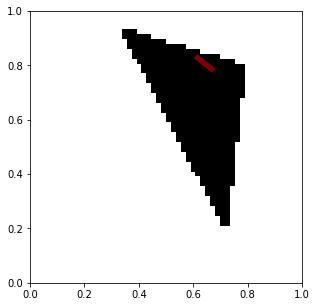

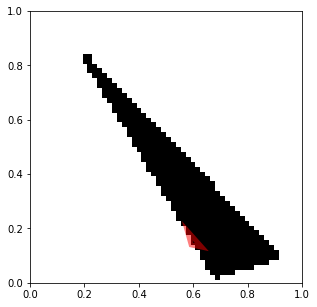

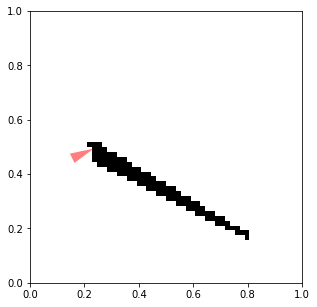

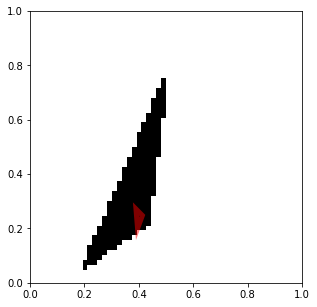

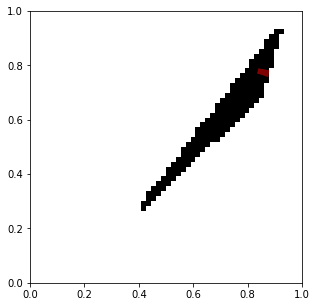

In [36]:
chosen_indices = range(0, 300, 60)
for index in chosen_indices:
  X_new = X_test[index, :]
  # output_new = y_test[index]
  output_new = output[index].detach().cpu().numpy()
  visualize_prediction(X_new, output_new)

As we can see, the changes that I introduced did not really help: the predicted coordinates still fit the input triangles quite poorly.